<a href="https://colab.research.google.com/github/Abhishek5635/lInear_regression/blob/main/lin_rig_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_california_housing

In [2]:
dataset = fetch_california_housing()

In [4]:
dataset
print(dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [5]:
print(dataset.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [6]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [7]:
print(dataset.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [11]:
import pandas as pd
df =pd.DataFrame(dataset.data, columns = dataset.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


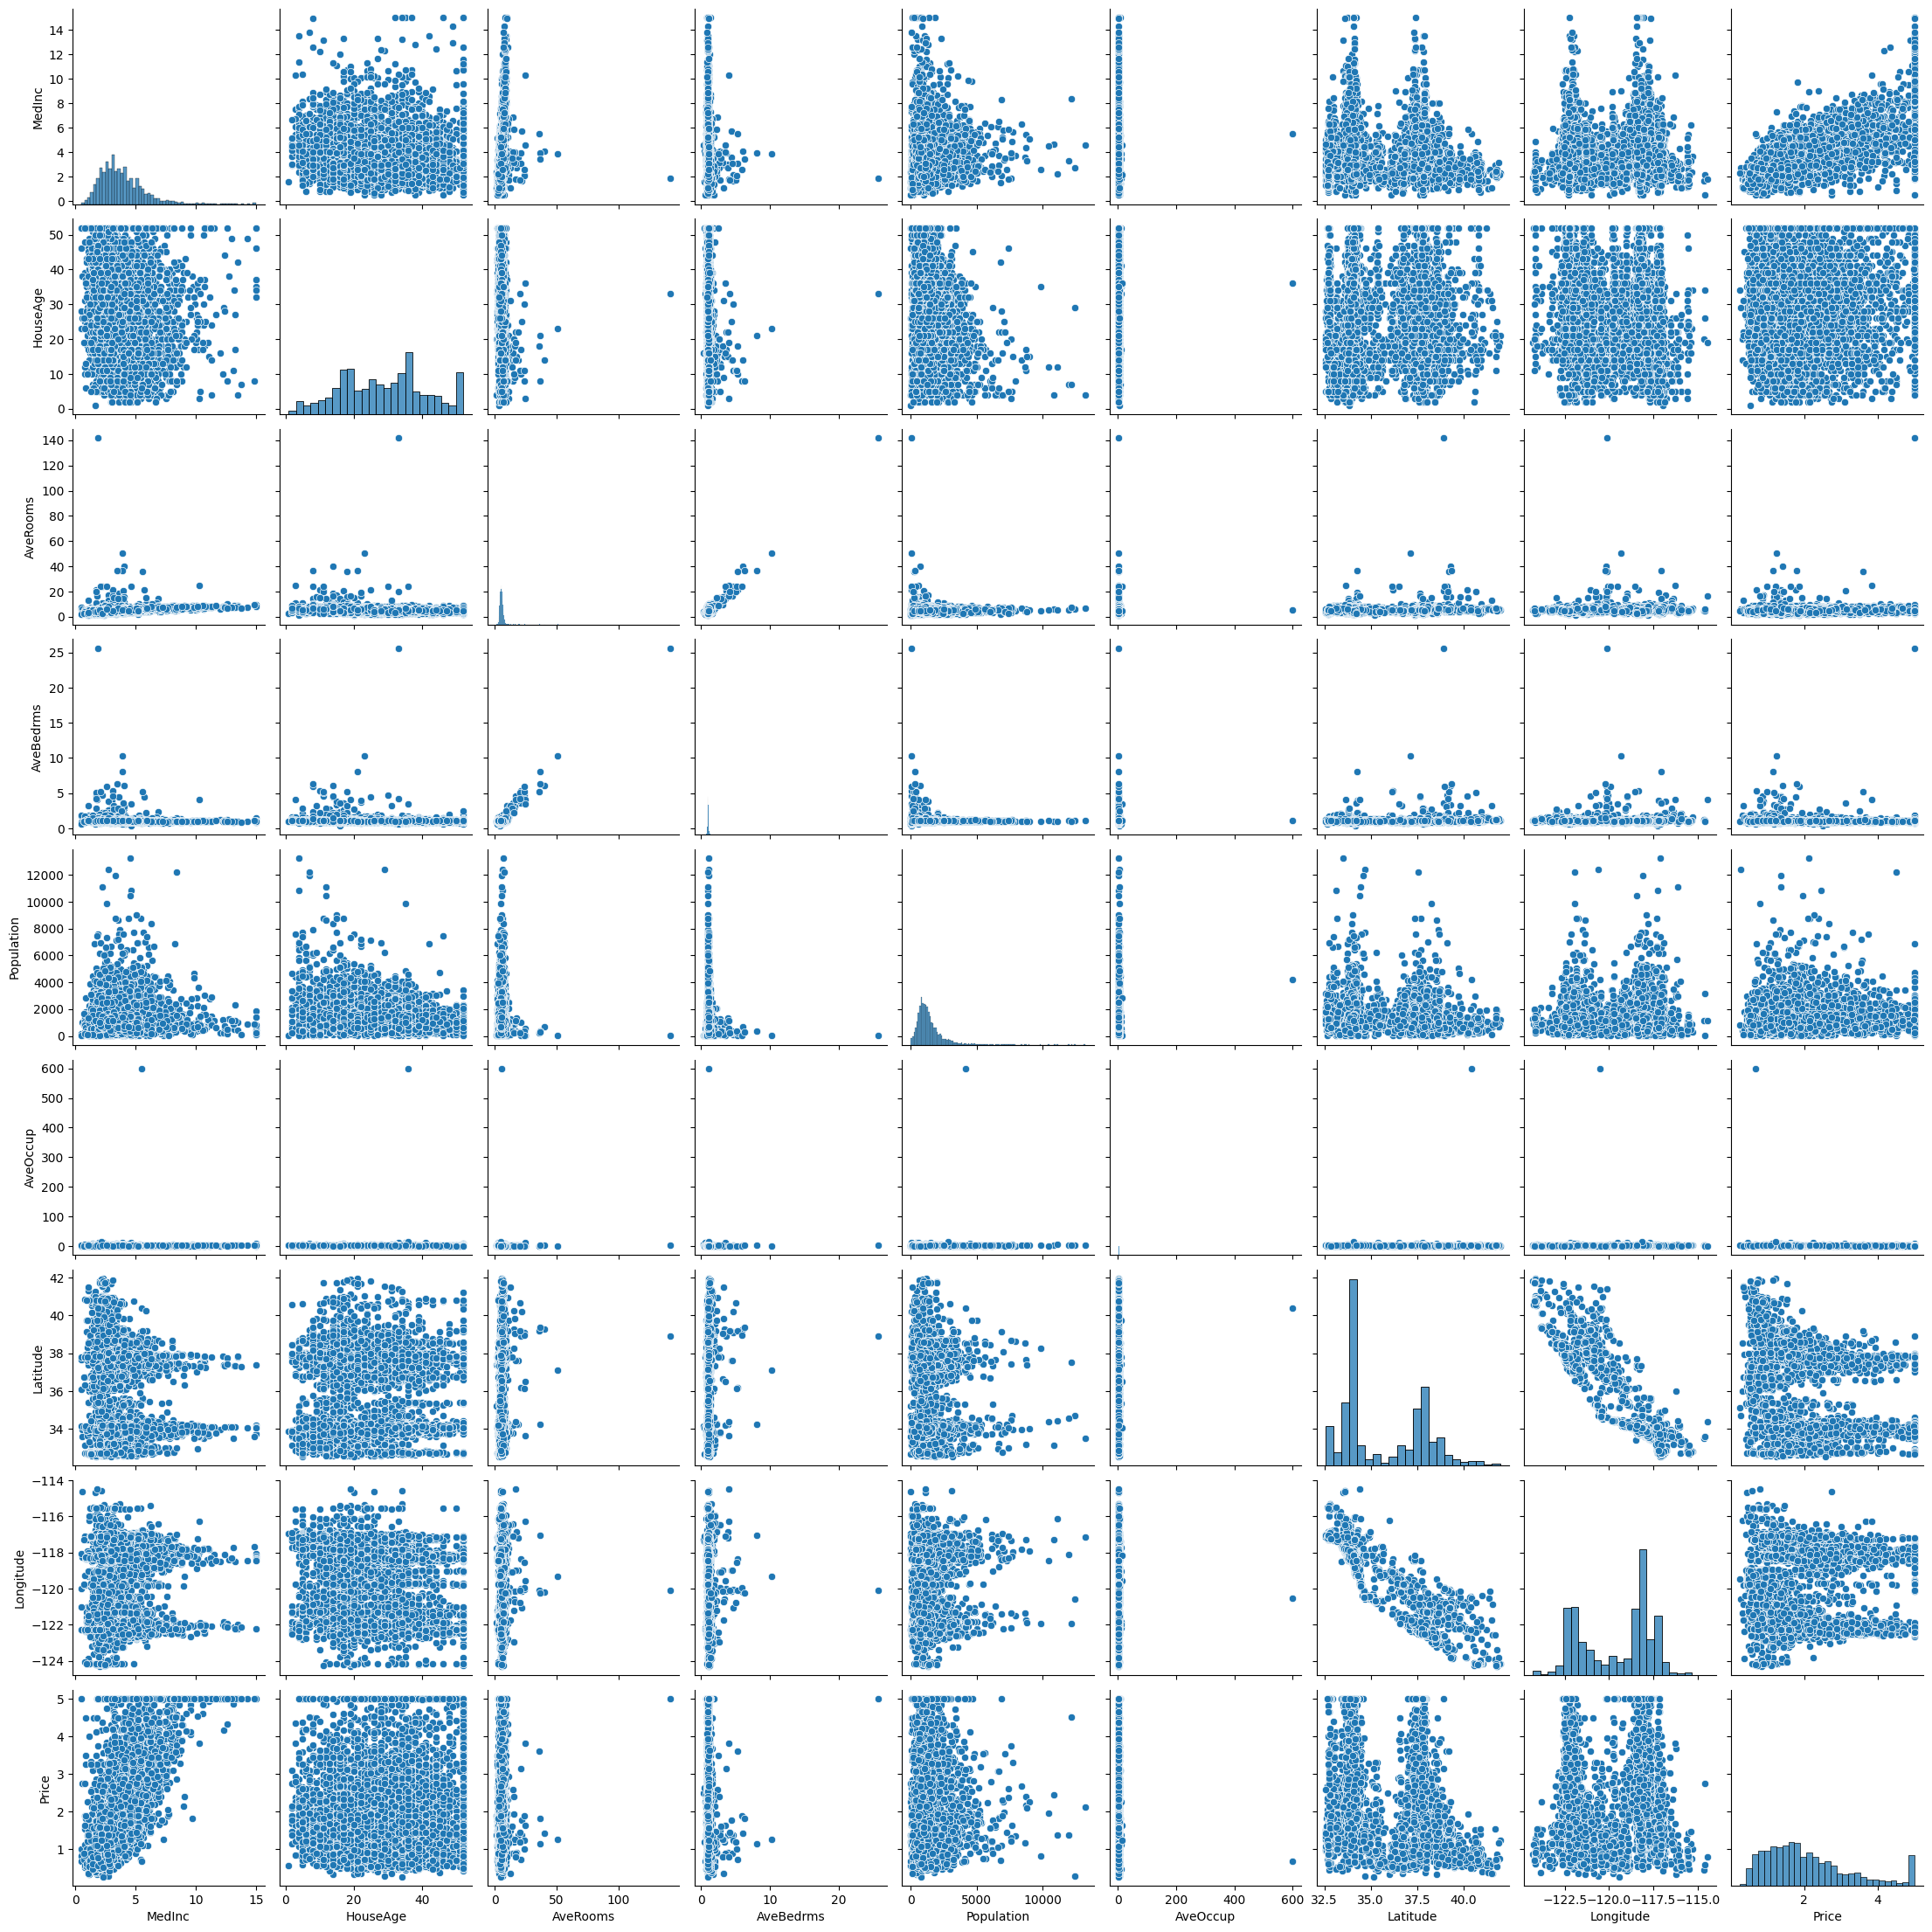

In [14]:
df["Price"] = dataset.target
sample =df.sample(frac = 0.25)
import seaborn as sns
sns.pairplot(sample)

In [59]:
# Divide our dataset into independant and dependant feature
X=df.iloc[:,:-1] # independant_fea
y=df.iloc[:,-1] #dependant_fea


In [60]:
# Divide or dataset into train and test data
# X_train is  the train data
#  x_test is the test data
# y_train and y_test is the output
# 33 percent of the dataset is test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.33, random_state=36)

In [101]:
X_test.shape

(6812, 8)

In [61]:
X_train.shape, X_test.shape

((13828, 8), (6812, 8))

In [62]:
# Feature Scaling ----- (Standardization)
# standardization means we need find mu = 0 and standard deviation(sigma) = 1
# scaler.fit() = It computes the mean and standard deviation of perticualr feature of X_train data
# scaler.fit_transform() = It computes both as well it apply z score formula
# z score = (x-mu)/sigma
# Dont do scaler.fit on xtest data because  mu and standard deviation will change of test data
# and if this changes the model wil get know about xtest data and this the problem data leakage
# so model only need to know about x_train data only
# On xtest data we will only use transform function and mean and standard devation of train data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [63]:
# all my features values are according to mu = 0 and sigma = 1
X_train = scaler.fit_transform(X_train)
X_train

array([[ 2.94615603,  1.69257444,  0.65840852, ...,  0.00631568,
        -0.67676958,  0.7291751 ],
       [-0.53712836,  0.26178584, -0.61551141, ...,  0.10882511,
        -0.78878315,  0.59982719],
       [ 0.02597188,  0.50025061, -0.14510172, ..., -0.11288116,
         0.79807576, -1.19114398],
       ...,
       [-0.46390242,  0.57973886, -0.72060079, ...,  0.24671234,
        -0.77478146,  0.69932558],
       [ 0.03045085, -0.85104973,  0.29681501, ..., -0.04515438,
         1.27880067, -1.66873629],
       [ 0.48355594, -0.69207322, -0.02275645, ..., -0.12518059,
         0.95676166, -1.25084302]])

In [64]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.07003245, -1.88439705, -0.14330011, ..., -0.10560014,
        -0.74677806,  0.93812174],
       [-1.04892878,  1.0566684 , -0.26431499, ..., -0.01249385,
         1.40014871, -0.91752338],
       [ 0.15617449, -0.13565543, -0.33324929, ..., -0.17835535,
        -0.74211083,  0.55007799],
       ...,
       [ 3.81372206,  0.26178584,  0.71929056, ..., -0.0768889 ,
        -0.71877467,  0.55007799],
       [ 2.52179968,  0.26178584,  0.88449779, ..., -0.03343845,
        -0.69077128,  0.54510307],
       [-0.37291683,  0.50025061, -0.01804122, ...,  0.18848079,
        -0.74677806,  0.8037989 ]])

In [65]:
#Model traing
# .fit method is used for fit or create our model
# previous .fit method we use for change our values according to mu and sigma

In [66]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
# here y_train is our output
regression.fit(X_train, y_train)

LinearRegression()

In [67]:
# the coef says that for unit change x train data parameter 0.837000024 times change the price
# - means decreasing price and + means price increasing
regression.coef_

array([ 0.83700024,  0.12271899, -0.26347102,  0.30713139, -0.0081633 ,
       -0.02764702, -0.90609856, -0.87576409])

In [68]:
# when all the values are zeros then the price of house will be 2.07082592
regression.intercept_

2.0708259184263804

In [71]:
# Prediction for the new data
# this gives us predicted value of base fit line
y_pred = regression.predict(X_test)
y_pred


array([1.74054339, 0.90455512, 2.45240228, ..., 5.22766823, 4.15452378,
       1.73613111])

In [72]:
# Find MSE, AMSE, RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [74]:
import numpy as np
mse = mean_squared_error(y_test, y_pred)
print('MSE : ', mse)
mae = mean_absolute_error(y_test, y_pred)
print("MAE : ", mae)
print('RMSE : ', np.sqrt(mse))

MSE :  0.5335029155157139
MAE :  0.5408989481794169
RMSE :  0.730412839095613


In [78]:
## For accuracy r2 and adjusted r2
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
score
# this is the accuracy of the model

0.5875394343499214

In [77]:
#display adjusted R-squared
# adj_r2_score is always less than r2 score from theory
# len(y) - 1 = number of records
# x.shape[1] = number of predictors

adj_r2_score = 1 - (1-score)*(len(y)-1)/(len(y)-X.shape[1]-1)
adj_r2_score

0.5873794961731389

In [108]:
# For accuracy improvement
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 30)
ridge.fit(X_train, y_train)

Ridge(alpha=30)

In [109]:
y_pred = ridge.predict(X_test)
y_pred

array([1.74149151, 0.92030239, 2.44540633, ..., 5.22571434, 4.152622  ,
       1.74075668])

In [110]:
import numpy as np
mse = mean_squared_error(y_test, y_pred)
print('MSE : ', mse)
mae = mean_absolute_error(y_test, y_pred)
print("MAE : ", mae)
print('RMSE : ', np.sqrt(mse))

MSE :  0.533639256788665
MAE :  0.5407801697839384
RMSE :  0.7305061647848463


In [111]:
import numpy as np
mse = mean_squared_error(y_pred, y_test)
print('MSE : ', mse)
mae = mean_absolute_error(y_pred, y_test)
print("MAE : ", mae)
print('RMSE : ', np.sqrt(mse))

MSE :  0.533639256788665
MAE :  0.5407801697839384
RMSE :  0.7305061647848463


In [91]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [94]:
y_pred= lasso.predict(X_test)
y_pred

array([2.07082592, 2.07082592, 2.07082592, ..., 2.07082592, 2.07082592,
       2.07082592])

In [96]:
# high error in this case so we reject this model to use
import numpy as np
mse = mean_squared_error(y_test, y_pred)
print('MSE : ', mse)
mae = mean_absolute_error(y_test, y_pred)
print("MAE : ", mae)
print('RMSE : ', np.sqrt(mse))

MSE :  1.2935112672240048
MAE :  0.9000629779192262
RMSE :  1.1373263679454568


In [97]:
from sklearn.linear_model import ElasticNet
elasticnet=ElasticNet(alpha=20.0)
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=20.0)

In [98]:
y_pred=elasticnet.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print(mse)
mae=mean_absolute_error(y_test,y_pred)
print(mae)
print(np.sqrt(mse))

1.2935112672240048
0.9000629779192262
1.1373263679454568
